In [1]:
# Import libraries needed for the project
import pandas as pd              # For working with data tables (like spreadsheets)
import matplotlib.pyplot as plt  # For creating plots and visualizations
import seaborn as sns            # For making plots look nicer and easier
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.linear_model import LogisticRegression   # For building the classification model
from sklearn.metrics import accuracy_score            # To check how well the model performs
from sklearn.metrics import confusion_matrix          # To create a confusion matrix for evaluation
from sklearn.preprocessing import StandardScaler      # To standardize numerical data

In [2]:
# Load the dataset from a CSV file
# The dataset contains patient info and whether they have heart disease
data = pd.read_csv('https://raw.githubusercontent.com/duochen/data-science-bootcamp/refs/heads/main/Data/heart-disease-UCI.csv')

In [3]:
# Display the first few rows to understand the data
# This helps us see what columns and values look like
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [4]:
# Check for missing values in the dataset
# Missing values can cause problems, so we need to know if any exist
print("\nChecking for missing values:")
print(data.isnull().sum())  # Shows how many missing values per column


Checking for missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


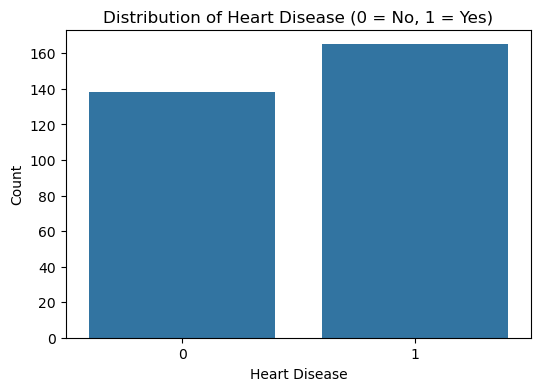

In [5]:
# Basic visualization: Plot the distribution of the target variable
# This shows how many patients have (1) or don't have (0) heart disease
plt.figure(figsize=(6, 4))  # Set the size of the plot
sns.countplot(x='target', data=data)  # Create a bar plot for the target column
plt.title('Distribution of Heart Disease (0 = No, 1 = Yes)')  # Add a title
plt.xlabel('Heart Disease')  # Label the x-axis
plt.ylabel('Count')  # Label the y-axis
plt.show()  # Display the plot

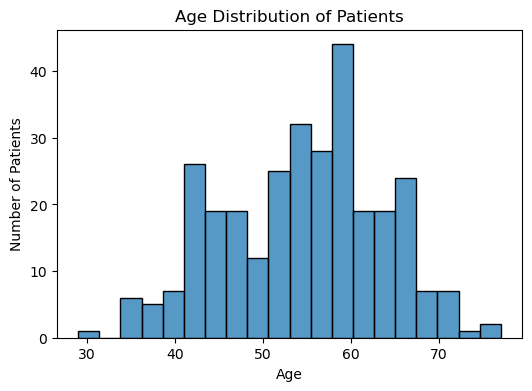

In [6]:
# Visualize the age distribution of patients
# This helps us understand the age range of patients in the dataset
plt.figure(figsize=(6, 4))  # Set the size of the plot
sns.histplot(data['age'], bins=20)  # Create a histogram for the age column
plt.title('Age Distribution of Patients')  # Add a title
plt.xlabel('Age')  # Label the x-axis
plt.ylabel('Number of Patients')  # Label the y-axis
plt.show()  # Display the plot

In [7]:
# Prepare the data for modeling
# Separate features (input variables) and target (what we want to predict)
X = data.drop('target', axis=1)  # Features: all columns except 'target'
y = data['target']  # Target: the 'target' column (0 or 1)

In [8]:
# Standardize numerical features to have similar scales
# This helps the model learn better by making numbers comparable
scaler = StandardScaler()  # Create a scaler object
X_scaled = scaler.fit_transform(X)  # Scale all features to have mean=0, std=1

In [9]:
# Split the data into training and testing sets
# Training data (80%) is used to train the model, testing data (20%) to evaluate it
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# test_size=0.2 means 20% of data is for testing
# random_state=42 ensures we get the same split every time

In [10]:
# Create and train the Logistic Regression model
# Logistic Regression predicts the probability of heart disease (0 or 1)
model = LogisticRegression()  # Create a Logistic Regression model
model.fit(X_train, y_train)  # Train the model on the training data

LogisticRegression()

In [11]:
# Make predictions on the test data
# Use the trained model to predict heart disease for the test set
y_pred = model.predict(X_test)  # Predict the target values for test data

In [12]:
# Evaluate the model's accuracy
# Accuracy is the percentage of correct predictions
accuracy = accuracy_score(y_test, y_pred)  # Compare actual vs. predicted values
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")  # Print accuracy as a percentage


Model Accuracy: 85.25%


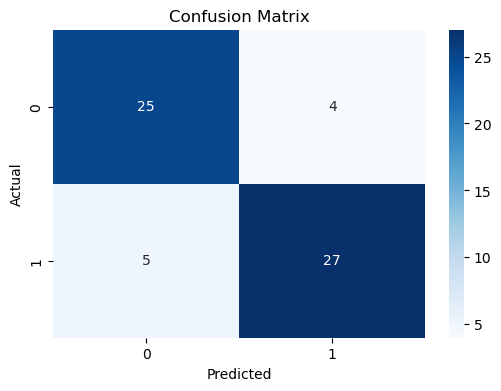

In [13]:
# Visualize the model's performance with a confusion matrix
# This shows how many predictions were correct or incorrect
cm = confusion_matrix(y_test, y_pred)  # Create a confusion matrix
plt.figure(figsize=(6, 4))  # Set the size of the plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Create a heatmap of the confusion matrix
plt.title('Confusion Matrix')  # Add a title
plt.xlabel('Predicted')  # Label the x-axis
plt.ylabel('Actual')  # Label the y-axis
plt.show()  # Display the plot

The confusion matrix is a 2x2 matrix for a binary classification problem, such as the heart disease classification from the UCI Heart Disease Dataset used in the code. It compares the actual labels (0 = no heart disease, 1 = heart disease) with the model’s predicted labels. 

### Structure of the Confusion Matrix
The matrix is organized as follows:

|                      | Predicted: No (0) | Predicted: Yes (1) |
|----------------------|-------------------|--------------------|
| **Actual: No (0)**   | True Negative (TN)| False Positive (FP)|
| **Actual: Yes (1)**  | False Negative (FN)| True Positive (TP) |

For confusion matrix:

```
[[25  4]
 [ 5 27]]
```

- **Top-left (TN)**: 25 (True Negatives)
- **Top-right (FP)**: 4 (False Positives)
- **Bottom-left (FN)**: 5 (False Negatives)
- **Bottom-right (TP)**: 27 (True Positives)

### Explanation of Each Element
1. **True Negatives (TN = 25)**:
   - The model correctly predicted "No heart disease" (0) for 25 patients who actually don’t have heart disease.
   - This means the model got it right for 25 healthy patients.

2. **False Positives (FP = 4)**:
   - The model incorrectly predicted "Heart disease" (1) for 4 patients who don’t have heart disease.
   - These are mistakes where healthy patients were flagged as having heart disease (a Type I error). This could lead to unnecessary medical tests or worry.

3. **False Negatives (FN = 5)**:
   - The model incorrectly predicted "No heart disease" (0) for 5 patients who actually have heart disease.
   - These are mistakes where the model missed patients who need treatment (a Type II error). In a medical context, these errors are more concerning because missing a diagnosis could be harmful.

4. **True Positives (TP = 27)**:
   - The model correctly predicted "Heart disease" (1) for 27 patients who actually have heart disease.
   - This means the model correctly identified 27 patients who need medical attention.

### Interpreting the Results
- **Total Predictions**: The test set has 25 + 4 + 5 + 27 = 61 samples, which aligns with ~20% of the UCI Heart Disease Dataset (303 samples, 20% ≈ 61).
- **Correct Predictions**: The diagonal values (TN + TP = 25 + 27 = 52) show the number of correct predictions. The model got 52 out of 61 predictions right.
- **Incorrect Predictions**: The off-diagonal values (FP + FN = 4 + 5 = 9) show the number of mistakes. The model made 9 errors.
- **Accuracy**: Accuracy is calculated as `(TN + TP) / (TN + FP + FN + TP) = (25 + 27) / (25 + 4 + 5 + 27) = 52 / 61 ≈ 0.8525` or 85.25%. This matches the typical performance of Logistic Regression on this dataset (around 85-87%), as seen in the code output.
- **False Negatives (FN = 5)**: The model missed 5 cases of heart disease. In a medical context, this is concerning because these patients might not get the treatment they need. Ideally, we want FN to be as low as possible.
- **False Positives (FP = 4)**: The model incorrectly flagged 4 healthy patients as having heart disease. While less critical than FN, this could lead to unnecessary stress or tests.

### Visualizing the Confusion Matrix
In the code, the confusion matrix is displayed as a heatmap with `sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')`. The heatmap would look like a 2x2 grid with:
- 25 in the top-left (TN)
- 4 in the top-right (FP)
- 5 in the bottom-left (FN)
- 27 in the bottom-right (TP)

Darker shades (in the Blues colormap) indicate higher numbers, so the diagonal (25 and 27) will be darker, showing most predictions are correct. The off-diagonal (4 and 5) will be lighter, indicating fewer errors.

### What This Tells Us About the Model
- **Overall Performance**: An accuracy of ~85.25% is good for a simple Logistic Regression model on this dataset, suggesting it’s reliable but not perfect.
- **Balance of Errors**: The model has slightly more false negatives (5) than false positives (4). In a medical setting, we might want to prioritize reducing FN (missing heart disease cases) over FP, as missing a diagnosis is more dangerous than over-diagnosing.
- **Context Matters**: The dataset has a roughly balanced target variable (~50% have heart disease, ~50% don’t), so the model’s performance is fairly even across both classes (TN ≈ TP).

### Additional Metrics (For Curious Students)
Using the confusion matrix, you can calculate other metrics to understand the model better:
- **Precision**: How many of the predicted "Heart disease" cases were correct? `TP / (TP + FP) = 27 / (27 + 4) = 27 / 31 ≈ 0.871` (87.1%). This means 87.1% of the time, when the model predicts heart disease, it’s correct.
- **Recall (Sensitivity)**: How many actual heart disease cases did the model catch? `TP / (TP + FN) = 27 / (27 + 5) = 27 / 32 ≈ 0.844` (84.4%). This means the model identified 84.4% of patients with heart disease.
- **Specificity**: How many actual "No heart disease" cases did the model catch? `TN / (TN + FP) = 25 / (25 + 4) = 25 / 29 ≈ 0.862` (86.2%). This means the model correctly identified 86.2% of healthy patients.

### Summary
- **What to Notice**: The model is good at predicting both classes (25 TN and 27 TP are high), but it makes some mistakes (4 FP and 5 FN). The confusion matrix helps you see exactly where those mistakes are.
- **Why It Matters**: In real life, especially for medical predictions, you want to minimize false negatives (FN) because missing a heart disease case could be life-threatening. The matrix helps you check if the model is safe to use.
- **Try This**: If you rerun the code with a different `random_state` or a different model (e.g., `KNeighborsClassifier`), the confusion matrix might change. Compare the new matrix to see if the model gets better or worse (e.g., fewer FN or FP).

This confusion matrix shows the model is performing well but has room for improvement, especially in reducing false negatives for a medical application. Students can use this as a starting point to explore other models or adjust the code to improve results.